In [2]:
pip install beautifulsoup4 lxml

Note: you may need to restart the kernel to use updated packages.


In [6]:
from bs4 import BeautifulSoup
import json
import urllib.request
import codecs
file = codecs.open("en2550_assignment_3.html", "r", "utf-8")
text = file.read()
#for local html file
#response = open("en2550_assignment_3.html")
#text = response.read()

soup = BeautifulSoup(text, 'lxml')

dictionary = {'nbformat': 4, 'nbformat_minor': 1, 'cells': [], 'metadata': {}}
for d in soup.findAll("div"):
    if 'class' in d.attrs.keys():
        for clas in d.attrs["class"]:
            if clas in ["text_cell_render", "input_area"]:
                # code cell
                if clas == "input_area":
                    cell = {}
                    cell['metadata'] = {}
                    cell['outputs'] = []
                    cell['source'] = [d.get_text()]
                    cell['execution_count'] = None
                    cell['cell_type'] = 'code'
                    dictionary['cells'].append(cell)

                else:
                    cell = {}
                    cell['metadata'] = {}

                    cell['source'] = [d.decode_contents()]
                    cell['cell_type'] = 'markdown'
                    dictionary['cells'].append(cell)
open('notebook.ipynb', 'w').write(json.dumps(dictionary))

65

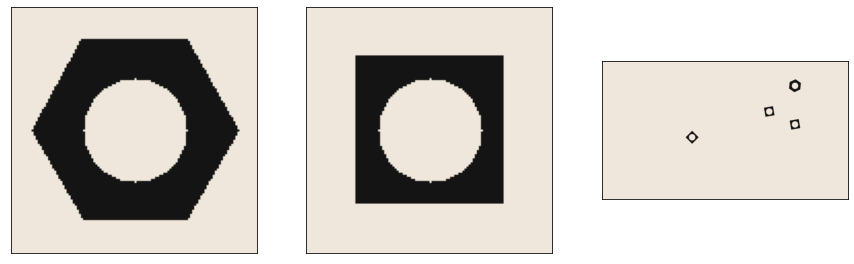

In [28]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize=(15,12))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

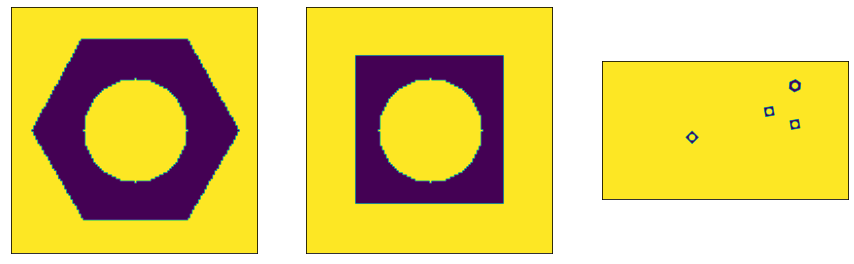

In [29]:
#grayscale images
hexnut_template=cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squarenut_template=cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_f100=cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

# Otsu's thresholding
ret1,th1 = cv.threshold(hexnut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2,th2 = cv.threshold(squarenut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3,th3 = cv.threshold(conveyor_f100,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

fig, ax = plt. subplots(1,3,figsize=(15,12))
ax[0].imshow(th1)
ax[1].imshow(th2)
ax[2].imshow(th3)
for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

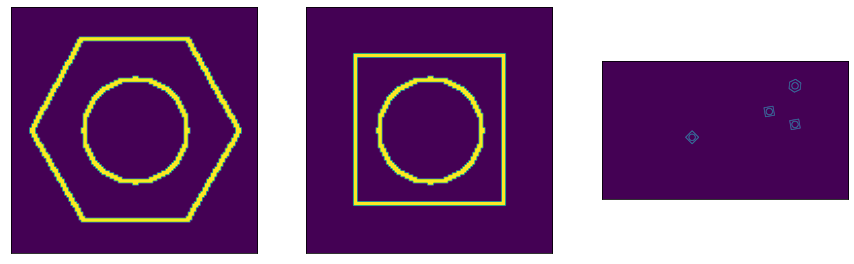

In [27]:
kernel = np.ones((3,3),np.uint8)
grad1 = cv.morphologyEx(th1, cv.MORPH_GRADIENT, kernel)
grad2 = cv.morphologyEx(th2, cv.MORPH_GRADIENT, kernel)
grad3 = cv.morphologyEx(th3, cv.MORPH_GRADIENT, kernel)

fig,ax=plt.subplots(1,3,figsize=(15,12))
ax[0].imshow(grad1)
ax[1].imshow(grad2)
ax[2].imshow(grad3)
for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

In [38]:
output1 = cv.connectedComponentsWithStats(th1, 8, cv.CV_32S)
output2 = cv.connectedComponentsWithStats(th2, 8, cv.CV_32S)
output3 = cv.connectedComponentsWithStats(th3, 8, cv.CV_32S)

# number of labels
num_labels = [output1[0],output2[0],output3[0]]
# label matrix
labels = [output1[1],output2[1],output3[1]]
# stat matrix
stats = [output1[2],output2[2],output3[2]]
# centroid matrix
centroids = [output1[3],output2[3],output3[3]]


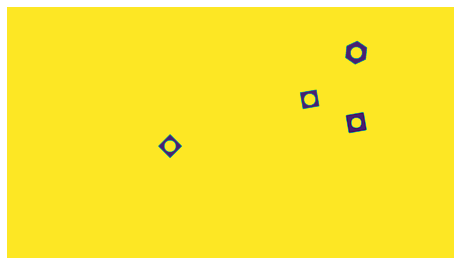

In [47]:
contours, hierarchy = cv.findContours(grad3, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt = contours[4]
cont_output=cv.drawContours(conveyor_f100, [cnt], 0, (0,255,0), 3)
plt.figure(figsize=(8, 10))
plt.imshow(cont_output)
plt.axis('off')
plt.show()

In [ ]:
fig, ax = plt. subplots(1,3)
ax[0].imshow(hexnut_template)
ax[1].imshow(squarenut_template)
ax[2].imshow(conveyor_f100)
plt.show()